In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from statistics import median
%matplotlib inline
import os
from prettytable import PrettyTable

In [2]:
def moving_avg(array, window_size):
    back = int(np.ceil(window_size))
    forward = int(np.floor(window_size))
    return [np.mean(array[max(0,i-back):i+forward]) for i in range(len(array))]

In [53]:
# files = [['yr_with_shunt_baseline','yr_without_shunt_baseline']]
#files = [['renorm_10_baseline','renorm_50_baseline']]
files = [['qtr_yr', 'qtr_yr_baseline']]
# files=[['summer_wk', 'summer_wk_baseline']]
# files = [['v11','baseline_v11']]

In [47]:
rl_buses = []
for pair in files:
    for file in pair:
        for home_file in os.listdir(f'models/{file}/homes'):
            if 'actions' in home_file:
                bus = int(home_file[3:6])
                cluster = int(home_file[6])
                rl_buses += [bus]
                

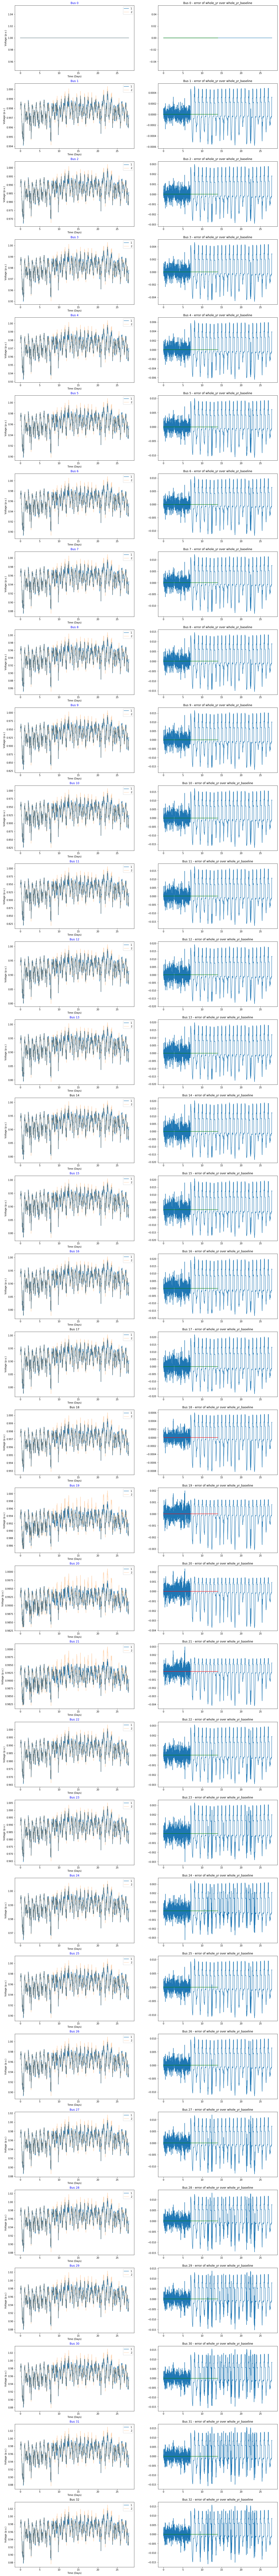

In [48]:
improved_buses = []
fig, ax = plt.subplots(33,2 ,figsize=(20,200))

for pair in files:
    diff = []
    improved = 0
    for j in range(2):
        file = pair[j]
        data = np.genfromtxt(f'models/{file}/voltage.csv', delimiter=',')
        x = np.arange(len(data))/24/4
        diff += [data]
        for i in range(33):
            al = 0.3 if 'baseline' in file else 1
            ax[i][0].plot(x, data[:,i],alpha=al)
            ax[i][0].set_xlabel("Time (Days)")
            ax[i][0].set_ylabel("Voltage (p.u.)")
            c = 'blue' if (i+1) in rl_buses else 'black'
            ax[i][0].set_title(f"Bus {i}", color=c)
            ax[i][0].legend(['1', '2'])
    for i in range(33):
        improvement = abs(diff[1][:,i]-1) - abs(diff[0][:,i]-1)
        mean = np.mean(improvement)
        if mean >= 0:
            c = 'g'
            improved += 1
        else:
            c = 'r'
        ax[i][1].plot(np.linspace(0,28,len(improvement)), improvement)
        ax[i][1].plot([0,28], np.zeros(2), color=c)
        ax[i][1].set_title(f"Bus {i} - error of {pair[0]} over {pair[1]}")
    improved_buses += [improved,0]

plt.show()

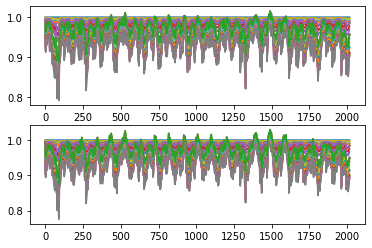

In [49]:
fig, ax = plt.subplots(2)
for i in range(2):
    ax[i].plot(diff[i][96*7:])
#     for j in range(33):
#         print(j+1,min(diff[i][:,j]),max(diff[i][:,j]))

-2529970.149230336
-2691309.909195853


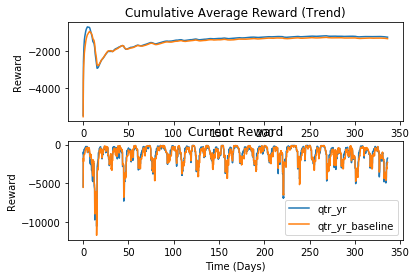

In [56]:
fig, ax = plt.subplots(2)
legend = []
# headers = ['file name', 'tot. reward']
# headers += ['', for file in files]
t = PrettyTable(['File Name', 'Reward', 'n Impr', '% Impr'])

for pair in files:
    rewards = []
    rows = []
    for file in pair:
        scale = 5 if 'baseline' in file else 1
        reward = scale * np.genfromtxt(f'models/{file}/reward.csv', delimiter=',')[7*24*4:]
        print(sum(reward))
        ax[0].plot(np.linspace(0,len(reward)/24*4,len(reward)), np.divide(np.cumsum(reward), np.arange(len(reward))+1))
        ax[1].plot(np.linspace(0,len(reward)/24*4,len(reward)), reward)
#         ax[1].plot(np.linspace(0,182,len(reward)), np.multiply(reward,0.1)+5)
        [foo.set_xlabel('Time (Days)') for foo in ax]
        [foo.set_ylabel('Reward') for foo in ax]
        ax[0].set_title("Cumulative Average Reward (Trend)")
        ax[1].set_title("Current Reward")
        
#         ax[0].set_ylim(-30,-10)
#         ax[1].set_ylim(-30,-10)
        rewards += [sum(reward)]
#         rows += [[file, rewards[-1], improved_buses.pop()]]
#     rows[0] += [(rewards[0]-rewards[-1])/rewards[0]]
#     rows[1] += [0]
#     for row in rows:
#         t.add_row(row)
    legend += pair
plt.legend(legend)

In [61]:
(rewards[0] - rewards[1])/rewards[1]

-0.05994841374983992

In [ ]:
print(t)

In [ ]:
n_homes = np.nan
pair = files[0]
for file in pair:
    len_files = len(os.listdir(f'models/{file}/homes'))
    if len_files > n_homes or len_files < n_homes:
        print("Warning: The number of RL controlled homes is not the same for these files.")
    else:
        n_homes = len_files


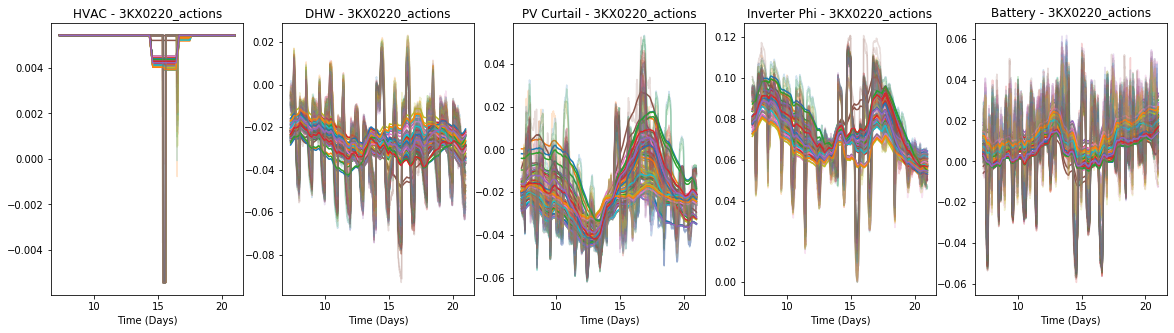

In [55]:
action_order = ['HVAC', 'DHW', 'PV Curtail', 'Inverter Phi', 'Battery']
#fig, ax = plt.subplots(int(0.5*n_homes), 5, figsize=(20,80))
fig, ax = plt.subplots(1, 5, figsize=(20,5))

h = -1
for file in [pair[0]]:
    h=-1
    homes = os.listdir(f'models/{file}/homes')
    for home in homes:
        
        #home = homes[h]
        if 'action' in home:
            h += 1
            actions = np.genfromtxt(f'models/{file}/homes/{home}', delimiter=',')
            for a in range(actions.shape[1]):
                c = ax[a]._get_lines.get_next_color()
                ax[a].plot(np.linspace(0,21,actions.shape[0])[700:], moving_avg(actions[:,a], 100)[700:], color=c)
                ax[a].plot(np.linspace(0,21,actions.shape[0])[700:], actions[:,a][700:], color=c, alpha=0.2)
                ax[a].set_xlabel("Time (Days)")
#                 if a + offset in [] 
                #ax[h][a+offset].set_ylim(-1,1)
                
                ax[a].set_title(f"{action_order[a]} - {home[:-4]}")

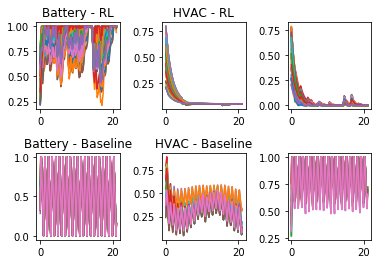

In [54]:
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

i = -1

for file in pair:
    i += 1
    homes = os.listdir(f'models/{file}/homes')
    if i == 0:
        c = 'RL'
    else:
        c = 'Baseline'
    for home in homes:
        
        if 'batt' in home:
            h += 1
            actions = np.genfromtxt(f'models/{file}/homes/{home}', delimiter=',')
            ax[i][0].plot(np.linspace(0,21,len(actions)),actions)
            ax[i][0].set_title(f'Battery - {c}')
                
        elif 'hvac' in home:
            actions = np.genfromtxt(f'models/{file}/homes/{home}', delimiter=',')
            ax[i][1].plot(np.linspace(0,21,len(actions)),actions)
            ax[i][1].set_title(f'HVAC - {c}')
            
        elif 'dhw' in home:
            actions = np.genfromtxt(f'models/{file}/homes/{home}', delimiter=',')
            ax[i][2].plot(np.linspace(0,21,len(actions)),actions)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: genfromtxt: Empty input file: "models/whole_yr/homes/KPP0320_rewards.csv"
  if __name__ == '__main__':


ValueError: x and y must have same first dimension, but have shapes (2016,) and (0,)

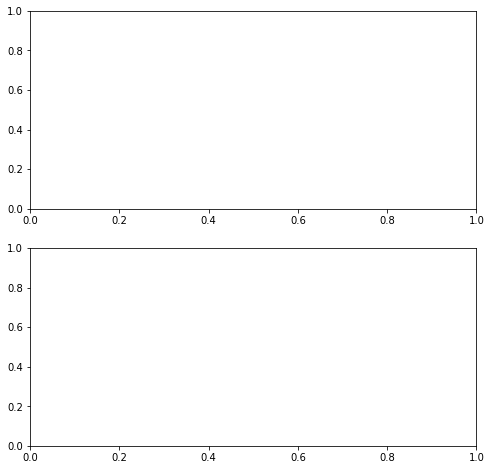

In [51]:
fig, ax = plt.subplots(2, figsize=(8,8))

a = -1
for file in files[0]:
    a += 1
    homes = os.listdir(f'models/{file}/homes')
    for home in homes:
        if 'reward' in home:
            rew = np.genfromtxt(f'models/{file}/homes/{home}', delimiter=',')
#             rew = np.clip(rew, -4,0)
#             rew = 0.5*rew
#             rew = rew + 1
            #print(rew)
            c = ax[a]._get_lines.get_next_color()
            ax[a].plot(np.linspace(0,21,96*21), rew[:96*21], color=c)
            ax[a].set_xlabel("Time (Days)")
            ax[a].set_title(f"Reward")

In [ ]:
plt.plot(data)